<a href="https://colab.research.google.com/github/Rendrikson98/Aprendizado-de-M-quina/blob/master/regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importar bibliotecas necessárias e realizando a leitura dos dados**

https://www.kaggle.com/edenau/london-bike-sharing-system-data?select=journeys.csv

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/journeys.csv')
data.head() 

,JourneyDuration,JourneyID,EndDate,EndMonth,EndYear,EndHour,EndMinute,EndStationID,StartDate,StartMonth,StartYear,StartHour,StartMinute,StartStationID
0,2040.0,953,19,9,17,18,0,478,19,9,17,17,26,251
1,1800.0,12581,19,9,17,15,21,122,19,9,17,14,51,550
2,1140.0,1159,15,9,17,17,1,639,15,9,17,16,42,212
3,420.0,2375,14,9,17,12,16,755,14,9,17,12,9,163
4,1200.0,14659,13,9,17,19,33,605,13,9,17,19,13,36


**Limpeza e organização dos dados**

In [113]:
data = data.drop(columns=['JourneyID','EndStationID', 'StartStationID', 'EndYear', 'StartYear'])
data.head()

,JourneyDuration,EndDate,EndMonth,EndHour,EndMinute,StartDate,StartMonth,StartHour,StartMinute
0,2040.0,19,9,18,0,19,9,17,26
1,1800.0,19,9,15,21,19,9,14,51
2,1140.0,15,9,17,1,15,9,16,42
3,420.0,14,9,12,16,14,9,12,9
4,1200.0,13,9,19,33,13,9,19,13


**Análise Preliminar dos Dados**

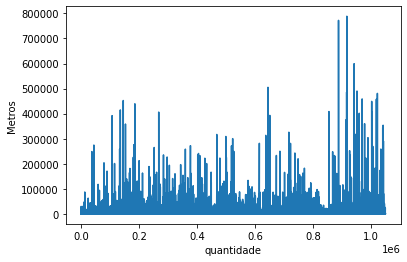

In [114]:
#plotando Duração de um viagem
plt.plot(data.JourneyDuration)
plt.xlabel('quantidade')
plt.ylabel('Metros')
plt.show()

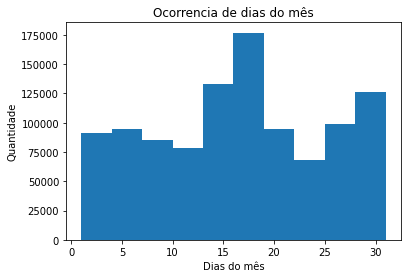

In [115]:
#plotando ocorrência de dias do mês
plt.hist(data.StartDate)
plt.xlabel('Dias do mês')
plt.ylabel('Quantidade')
plt.title('Ocorrencia de dias do mês')
plt.show()

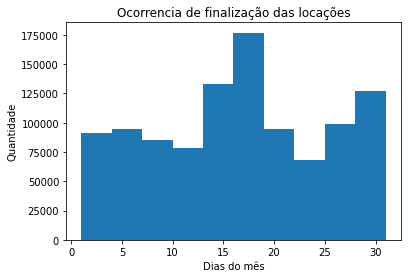

In [116]:
#plotando ocorrência de dias com final da locação
plt.hist(data.EndDate)
plt.xlabel('Dias do mês')
plt.ylabel('Quantidade')
plt.title('Ocorrencia de finalização das locações')
plt.show()

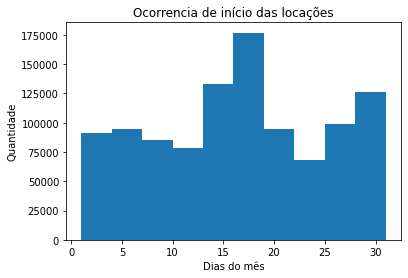

In [117]:
#plotando ocorrência de dias com início da locação
plt.hist(data.StartDate)
plt.xlabel('Dias do mês')
plt.ylabel('Quantidade')
plt.title('Ocorrencia de início das locações')
plt.show()

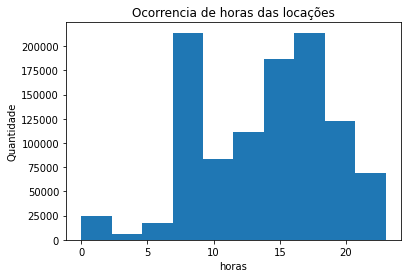

In [118]:
#plotando ocorrência tempo da locação
plt.hist(data.EndHour)
plt.xlabel('horas')
plt.ylabel('Quantidade')
plt.title('Ocorrencia de horas das locações')
plt.show()

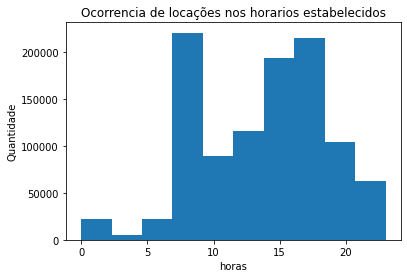

In [119]:
#plotando ocorrência tempo da locação
plt.hist(data.StartHour)
plt.xlabel('horas')
plt.ylabel('Quantidade')
plt.title('Ocorrencia de locações nos horarios estabelecidos')
plt.show()

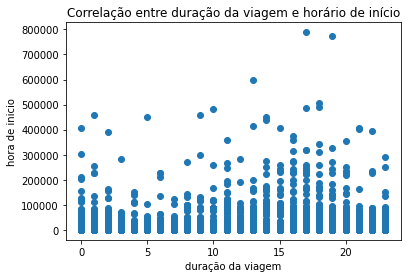

In [120]:
# plotando correlação entre temperatura e número de aluguéis
plt.scatter(data.StartHour, data.JourneyDuration)
plt.xlabel('duração da viagem')
plt.ylabel('hora de inicio')
plt.title('Correlação entre duração da viagem e horário de início')
plt.show()

**Re-escala dos dados**

In [121]:
data = (data - data.min())/(data.max()-data.min())
data.head()

,JourneyDuration,EndDate,EndMonth,EndHour,EndMinute,StartDate,StartMonth,StartHour,StartMinute
0,0.002587,0.600000,1.0,0.782609,0.000000,0.600000,1.0,0.739130,0.440678
1,0.002282,0.600000,1.0,0.652174,0.355932,0.600000,1.0,0.608696,0.864407
2,0.001446,0.466667,1.0,0.739130,0.016949,0.466667,1.0,0.695652,0.711864
3,0.000533,0.433333,1.0,0.521739,0.271186,0.433333,1.0,0.521739,0.152542
4,0.001522,0.400000,1.0,0.826087,0.559322,0.400000,1.0,0.826087,0.220339


**Organizando dados para modelagem**

In [122]:
#dividindo dados em atributos descritores e atributo de classe
X = data.drop(columns=['JourneyDuration'])
X.head()

,EndDate,EndMonth,EndHour,EndMinute,StartDate,StartMonth,StartHour,StartMinute
0,0.600000,1.0,0.782609,0.000000,0.600000,1.0,0.739130,0.440678
1,0.600000,1.0,0.652174,0.355932,0.600000,1.0,0.608696,0.864407
2,0.466667,1.0,0.739130,0.016949,0.466667,1.0,0.695652,0.711864
3,0.433333,1.0,0.521739,0.271186,0.433333,1.0,0.521739,0.152542
4,0.400000,1.0,0.826087,0.559322,0.400000,1.0,0.826087,0.220339


In [123]:
y = data.JourneyDuration
y.head()

0    0.002587
1    0.002282
2    0.001446
3    0.000533
4    0.001522
Name: JourneyDuration, dtype: float64

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) #random_state=42

**Treinando os modelos e fazendo previsão**

In [125]:
#definindo modelo de regressão linear
linear = LinearRegression()
linear.fit(X_train,y_train)
pred_linear = linear.predict(X_test)
print(pred_linear)

[0.00182604 0.00091292 0.0007609  ... 0.00091289 0.00190133 0.0009884 ]


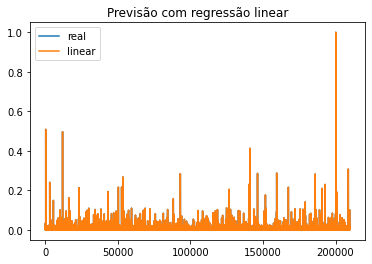

In [126]:
#plotando resultados da MLP
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_linear,label='linear')
plt.legend()
plt.title('Previsão com regressão linear')
plt.show()

In [127]:
#definindo modelo de árvore de decisão
arvore = DecisionTreeRegressor()
arvore.fit(X_train,y_train)
pred_arvore = arvore.predict(X_test)

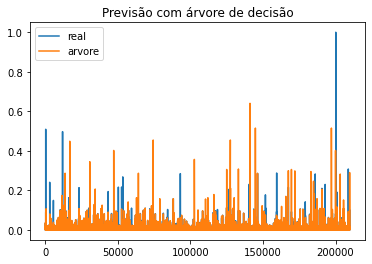

In [128]:
#plotando resultados da árvore de decisão
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_arvore,label='arvore')
plt.legend()
plt.title('Previsão com árvore de decisão')
plt.show()

In [129]:
#definindo modelo de random forest
floresta = RandomForestRegressor(n_estimators=100)
floresta.fit(X_train,y_train)
pred_floresta = floresta.predict(X_test)

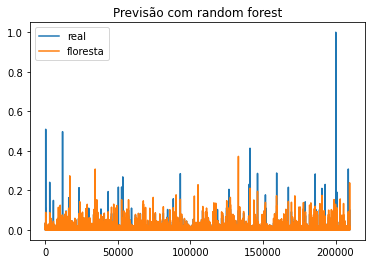

In [130]:
#plotando resultados da random forest
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_floresta,label='floresta')
plt.legend()
plt.title('Previsão com random forest')
plt.show()

In [131]:

#define modelo MLP
mlp = MLPRegressor(hidden_layer_sizes=(200,50),activation='logistic',max_iter=1000)
mlp.fit(X_train,y_train)
pred_mlp = mlp.predict(X_test)

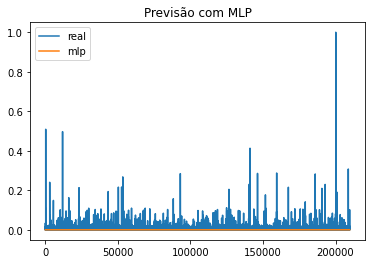

In [132]:
#plotando resultados da MLP
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_mlp,label='mlp')
plt.legend()
plt.title('Previsão com MLP')
plt.show()

**Avaliando Modelos**

**Mean Absolute Error (MAE)**

In [133]:
from sklearn.metrics import mean_absolute_error

#Mae Árvore
mean_absolute_error(y_test,pred_linear)

1.047792116954749e-05

In [134]:
#Mae Árvore
mean_absolute_error(y_test,pred_arvore)

0.00028746474046654157

In [135]:
#Mae Random Forest
mean_absolute_error(y_test,pred_floresta)

0.00021820040353502364

In [136]:
#Mae MLP
mean_absolute_error(y_test,pred_mlp)

0.001126583290601054

**Mean Squared Error (MSE)**

In [137]:
from sklearn.metrics import mean_squared_error


mean_squared_error(y_test,pred_linear)

3.956054539004271e-10

In [138]:
mean_squared_error(y_test,pred_arvore)

1.974596070308798e-05

In [139]:
mean_squared_error(y_test,pred_floresta)

1.1642587080595331e-05

In [140]:
mean_squared_error(y_test,pred_mlp)

2.249702536244557e-05

**Root Mean Squared Error (RMSE)**

In [141]:
mean_squared_error(y_test,pred_linear)**(1/2)

1.9889832927916392e-05

In [142]:
mean_squared_error(y_test,pred_arvore)**(1/2)

0.004443642729010511

In [143]:
mean_squared_error(y_test,pred_floresta)**(1/2)

0.003412123544157704

In [144]:
mean_squared_error(y_test,pred_mlp)**(1/2)

0.0047431029255589185

**Mean Absolute Percentage Error (MAPE)**

In [145]:
def mean_absolute_percentage_error(y_test,y_pred):
  y_test=y_test.values
  erro = 0
  for i in range(len(y_test)):
    erro += abs(y_test[i]-y_pred[i])/y_test[i]
  return erro/len(y_test)

In [146]:
mean_absolute_percentage_error(y_test,pred_linear)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


inf

In [147]:

mean_absolute_percentage_error(y_test,pred_arvore)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


nan

In [148]:

mean_absolute_percentage_error(y_test,pred_floresta)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


inf

In [149]:
mean_absolute_percentage_error(y_test,pred_mlp)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


inf

**Interpretação**

Nosso algoritmo de recressão teve os melhores resultado com a regressão linear e Rando forest. Por nossos dados se aproximarem do valor zero, não foi possível realizar o MAPE. 
Em nosso gráficos de previsões é possível observar a presição em nosssa previsão com regressão linear, tendo os dados lineares e os reais com o mesmo resultado, um outro gráfico que teve bom resultado foi o com regressão com árvores.
Nosso algoritmo foi treinado com o objetivo de ver a relação da duração das viagens com as bicletas alugadas comparadas com os dados restantes de inicio, duração e fim da locação.

É possível observar que o periódo que tem mais alugueis de bicicletas é nos finais de semanas como é o caso do dia 16 de semtembro de 2017 que teve o pico no numero de locações, também foi possível observa que os horários que possuim maior número de locação são os horários das 8h e as 18h.

Em nossos testes foi confirmado que nossa regressão linear é tem melhor resultado. É possível observe em nossas avaliaçãoes de modelos, na avalição MAE a regressão linear teve resultado acima de 1 enquanto as demais tiveram resultado abaixar de 1, o mesmo se repete para a avaliação RMSE. Com a avaliação MSE a regressão linear teve melhor resultado ficando com resultado superior a 3.
